# Exploratory Data Analysis

In this project we will be looking at a dataset of human brain MRI images collated from three datasets. The images are classified into 4 classes:
1. glioma
2. meningioma
3. no tumor
4. pituitary

We will carry out some Exploratory Data Analysis (EDA) to get a better intuition and understanding of the datasets. First we import the necessary libraries and reading the datasets into a manipulable format.

In [3]:
# Importing necessary libraries
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir(r'C:\Users\shah_\OneDrive\Desktop\_Data Science Toolbox\_Assessment 3')

C:\Users\shah_\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
train_dir = 'archive\Training\\'
test_dir = 'archive\Testing\\'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)
        
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+label):
        test_paths.append(test_dir+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

We check the distribution of categories in the training set.

Pituitary: 1457
No Tumor: 1595
Meningioma: 1339
Glioma: 1321

Total: 5712


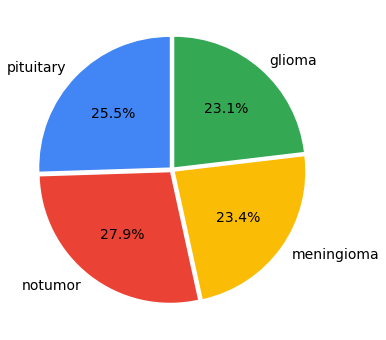

In [5]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
freq = [len([x for x in train_labels if x=='pituitary']),
         len([x for x in train_labels if x=='notumor']),
         len([x for x in train_labels if x=='meningioma']),
         len([x for x in train_labels if x=='glioma'])]
         
plt.pie(freq,
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=90);

print("Pituitary: " + str(freq[0]))
print("No Tumor: " + str(freq[1]))
print("Meningioma: " + str(freq[2]))
print("Glioma: " + str(freq[3]))
print("\nTotal: " + str(sum(freq)))

We now check the distribution of categories in the test set.

Pituitary: 300
No Tumor: 405
Meningioma: 306
Glioma: 300

Total: 1311


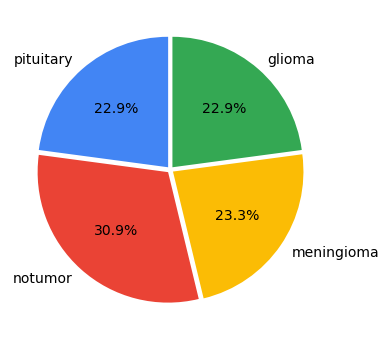

In [6]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
freq = [len([x for x in test_labels if x=='pituitary']),
         len([x for x in test_labels if x=='notumor']),
         len([x for x in test_labels if x=='meningioma']),
         len([x for x in test_labels if x=='glioma'])]
         
plt.pie(freq,
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=90);

print("Pituitary: " + str(freq[0]))
print("No Tumor: " + str(freq[1]))
print("Meningioma: " + str(freq[2]))
print("Glioma: " + str(freq[3]))
print("\nTotal: " + str(sum(freq)))

We check the training/test split in the form of a pie chart.

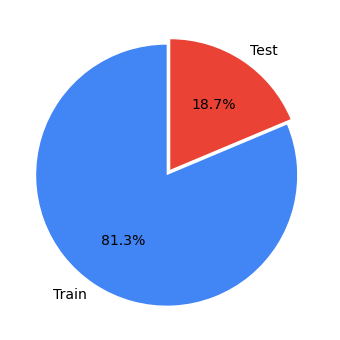

In [7]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=90);

We now display some examples of images in each class.

24


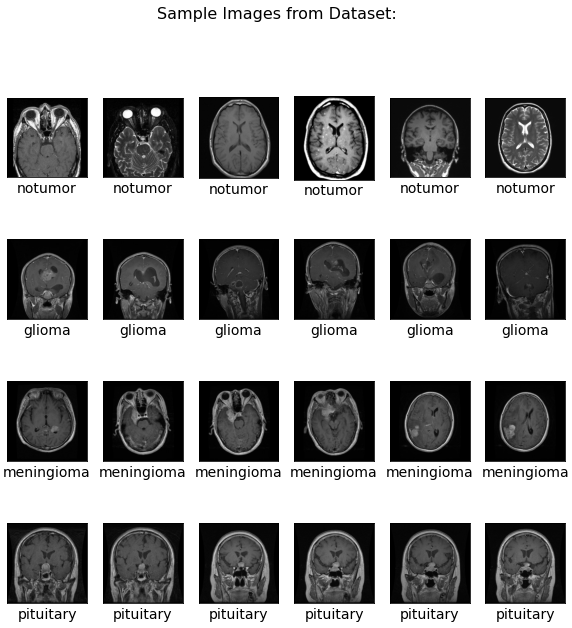

In [36]:
sample_scans = []
mri_scans = r"C:\Users\shah_\OneDrive\Desktop\_Data Science Toolbox\_Assessment 3\archive\Training\\"
diagnosis = ['notumor','glioma','meningioma','pituitary']
for i in range(len(diagnosis)):
    tumor_path_train = os.path.join(mri_scans, diagnosis[i])
    for j in range(6):
        sample_scans.append(np.array(Image.open(os.path.join(tumor_path_train, os.listdir(tumor_path_train)[j + i]))))
    
fig = plt.figure(figsize=(10,10))
fig.suptitle("Sample Images from Dataset:", fontsize=16)

for j in range(24):
    plt.subplot(4,6,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_scans[j], cmap=plt.cm.binary)
    plt.xlabel(diagnosis[j//6])
plt.show()

We see that there are 3 angles that these images are taken from: topdown, side-on and from the back. We will develop a tool later using a neural network to detect which angle the images are taken from.